<a href="https://colab.research.google.com/github/jsedoc/ConceptorDebias/blob/master/BERT_word_list_CN_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup BERT

In [1]:
!pip install flair

     |████████████████████████████████| 143kB 4.9MB/s 
     |████████████████████████████████| 133kB 38.5MB/s 
     |████████████████████████████████| 798kB 52.3MB/s 
     |████████████████████████████████| 655kB 45.9MB/s 
     |████████████████████████████████| 1.0MB 36.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/bd/57/d3/907c3ee02d35e66f674ad0106e61f06eeeb98f6ee66a6cc3fe
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
  Stored in directory: /root/.cache/pip/wheels/15/ee/a8/6112173f1386d33eebedb3f73429cfa41a4c3084556bcee254
  Stored in directory: /root/.cache/pip/wheels/35/e4/80/abf3b33ba89cf65cd262af8a22a5a999cc28fbfabea6b38473
Successfully built sqlitedict mpld3 segtok regex


In [2]:
from flair.embeddings import BertEmbeddings
from flair.data import Sentence


# init embedding
embedding = BertEmbeddings('bert-large-cased', layers="20,21,22,23")

100%|██████████| 1248501532/1248501532 [00:32<00:00, 38509080.81B/s]


In [0]:
import numpy as np
import torch
t = np.transpose
import matplotlib.pyplot as plt
%matplotlib inline

# Get Brown Corpus

In [4]:
from tqdm import tqdm

import nltk
nltk.download('brown')

from nltk.corpus import brown
brown_corpus = brown.sents()[:20000]

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [0]:
brown_e = []
for s in tqdm(brown_corpus):
    sentence = Sentence(' '.join(s))
    embedding.embed(sentence)
    sent_emb = torch.stack([token.embedding for token in sentence]).numpy()
    brown_e.append(sent_emb)

  7%|▋         | 1499/20000 [01:18<14:03, 21.94it/s]

In [0]:
import numpy as np
t = np.transpose
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from   sklearn.decomposition import PCA
from   sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from   sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
plt_style = 'seaborn-talk'
import seaborn as sns; sns.set()

# Experimental: HDBScan is a state-of-the-art clustering algorithm
hdbscan_available = True
try:
    import hdbscan
except ImportError:
    hdbscan_available = False

In [0]:
def do_plot(X_fit, title=None, labels=['']):
    dimension = X_fit.shape[1]
    label_types = sorted(list(set(labels)))
    num_labels = len(label_types)
    colors = cm.Accent(np.linspace(0, 1, num_labels))
    print(X_fit.shape, label_types, num_labels, colors)
    with plt.style.context(plt_style):
        fig = plt.figure()
        
        if dimension == 2:
            ax = fig.add_subplot(111)
            for lab, col in zip(label_types, colors):
                if num_labels>1:
                    idxs = [i for i,v in enumerate(labels) if v == lab]
                    import pdb; pdb.set_trace()
                    df = pd.DataFrame([[X_fit[i, 0] for i in idxs], [X_fit[i, 1] for i in idxs], [lab for i in idxs]], columns=['X','Y','label'])
                    if tdf != None:
                        tdf.append(df)
                    else:
                        tdf = df
                    #mt = [j for i,v in enumerate(labels) if v == lab]
                    #markers = {"Mary": "s", "John": "X"}
                    #ax = sns.scatterplot([X_fit[i, 0] for i in idxs],
                    #           [X_fit[i, 1] for i in idxs],
                    #           c=col, label=lab, style=pd.Series(col))
                else:
                    ax.scatter(X_fit[:, 0],
                               X_fit[:, 1],
                               c=col)
        elif dimension == 3:
            ax = fig.add_subplot(111, projection='3d')
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           X_fit[labels==lab, 2],
                           c=col)
        else:
            raise Exception('Unknown dimension: %d' % dimension)
        ax = sns.scatterplot(tdf.X,tdf.Y, hue=tdf.label, style=tdf.label)
        plt.title(title)
        if num_labels>1:
            ax.legend()
        plt.show()
        return tdf

In [0]:
def create_df(X_fit, labels):
    tdf =''
    label_types = sorted(list(set(labels)))
    print(label_types)
    for lab in label_types:
        idxs = [i for i,v in enumerate(labels) if v == lab]
        Z = [[X_fit[i, 0] for i in idxs], [X_fit[i, 1] for i in idxs], [lab for i in idxs]]
        df = pd.DataFrame(np.array(Z).T, columns=['PC1','PC2','word'])
        if type(tdf) != type(''):
            tdf = tdf.append(df)
        else:
            tdf = df
    return tdf

# New Section

In [0]:
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['he','she'])
pca = PCA(n_components=2)
pca.fit(X)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['executive','relatives','wedding','salary'])
df = create_df(pca.transform(X), labels=labels)


['executive', 'relatives', 'salary', 'wedding']


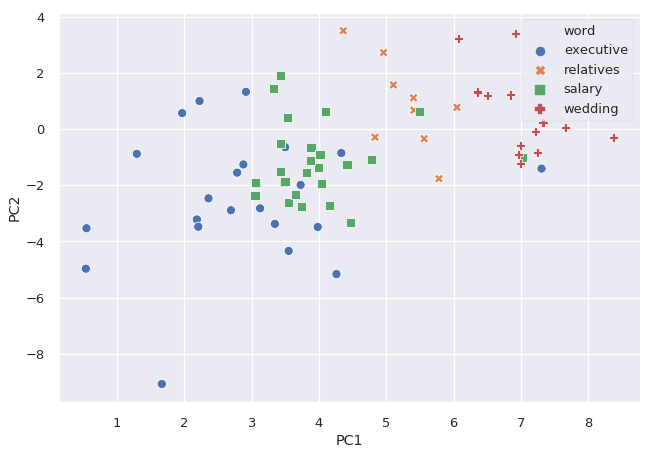

In [0]:
with plt.style.context(plt_style):
    fig = plt.figure()
    ax = sns.scatterplot(x=df.PC1.astype('float64'), y=df.PC2.astype('float64'), hue=df.word, style=df.word)
plt.show()

starting...
(4096, 2088)
R calculated
C calculated
negC calculated
(2088, 4096)
['executive', 'relatives', 'salary', 'wedding']


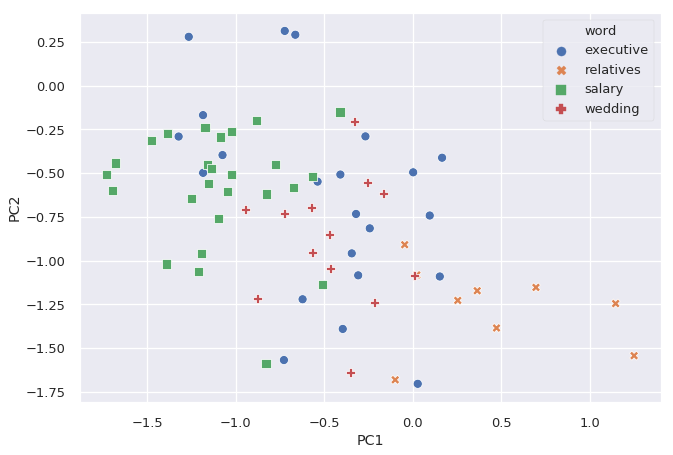

In [0]:
AB, AB_labels, _ = pick_embeddings(brown_corpus, brown_embs, ['he', 'she'])
XY, XY_labels, _ = pick_embeddings(brown_corpus, brown_embs, ['wedding', 'relatives','executive', 'salary'])#WEATLists.W_6_Career + WEATLists.W_6_Family)

Z = np.matrix(AB)
L = np.matrix(XY)
GnegC, GnewX, GR = post_process_cn_matrix(Z.T)

pca.fit(GnewX)
df = create_df(pca.transform((GnegC*L.T).T), labels=labels)

with plt.style.context(plt_style):
    fig = plt.figure()
    ax = sns.scatterplot(x=df.PC1.astype('float64'), y=df.PC2.astype('float64'), hue=df.word, style=df.word)
plt.show()

In [0]:
def pick_embeddings(corpus, sent_embs, word_list):
    X = []
    labels = []
    sents = []
    for i, s in enumerate(corpus):
        for j, w in enumerate(s):
            if w in word_list:
                X.append(sent_embs[i][j])
                labels.append(w)
                sents.append(s)
    return (X, labels, sents)

In [0]:
#brown_corpus = brown_corpus[:20000]
brown_embs = brown_e

(386, 2) ['John', 'Mary', 'husband', 'wife'] 4 [[0.498  0.7882 0.498  1.    ]
 [0.9922 0.7529 0.5255 1.    ]
 [0.9412 0.0078 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
> <ipython-input-62-653900a4aa6b>(16)do_plot()
-> df = pd.DataFrame([[X_fit[i, 0] for i in idxs], [X_fit[i, 1] for i in idxs], [lab for i in idxs]], columns=['X','Y','label'])
(Pdb) [X_fit[i, 0] for i in idxs]
*** NameError: name 'X_fit' is not defined
(Pdb) p X_fit
array([[ 18.0313,  -3.7581],
       [ 19.0955,   2.4399],
       [-12.7979,  -8.5769],
       [-14.6823,  -8.9644],
       [-14.6619,  -5.271 ],
       [ -7.3371,  -9.4487],
       [-14.8061,  -8.9884],
       [-16.2526, -12.9182],
       [-12.9015,  -1.8052],
       [-10.2424,  -6.0034],
       [ 20.4701,  -0.9063],
       [-14.2221,   0.204 ],
       [-10.9482,  -6.4139],
       [ 16.5498,  -2.6594],
       [ -9.5294,  -2.578 ],
       [-11.9551,  -4.6669],
       [-12.3487,  -7.1036],
       [ -4.516 ,  -4.5759],
       [ -8.1343,  -3.3622],
       [ 1

BdbQuit: ignored

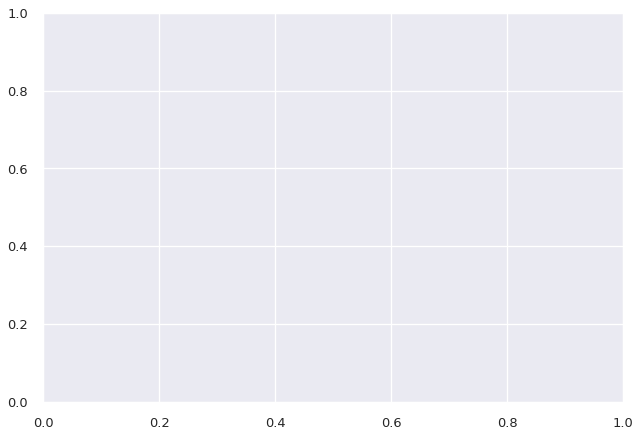

In [0]:
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['husband', 'wife', 'Mary', 'John'])
pca = PCA(n_components=2)
pca.fit(X)
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['man', 'woman'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['himself', 'herself'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['boy', 'girl'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['Mary', 'John'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['husband', 'wife'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['David', 'Lauren', 'Robert', 'Bonnie'])
do_plot(pca.transform(X), 'PCA', labels=labels)

In [0]:
# General word list
!wget https://raw.githubusercontent.com/IlyaSemenov/wikipedia-word-frequency/master/results/enwiki-20150602-words-frequency.txt
!git clone https://github.com/PrincetonML/SIF
    
# Gender word lists
!git clone https://github.com/uclanlp/gn_glove
!git clone https://github.com/uclanlp/corefBias
!wget https://www.cs.cmu.edu/Groups/AI/areas/nlp/corpora/names/female.txt
!wget https://www.cs.cmu.edu/Groups/AI/areas/nlp/corpora/names/male.txt
    
# our code for debiasing -- also includes word lists    
!git clone https://github.com/jsedoc/ConceptorDebias

--2019-06-10 22:11:36--  https://raw.githubusercontent.com/IlyaSemenov/wikipedia-word-frequency/master/results/enwiki-20150602-words-frequency.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2019-06-10 22:11:36 ERROR 404: Not Found.

fatal: destination path 'SIF' already exists and is not an empty directory.
fatal: destination path 'gn_glove' already exists and is not an empty directory.
fatal: destination path 'corefBias' already exists and is not an empty directory.
--2019-06-10 22:11:42--  https://www.cs.cmu.edu/Groups/AI/areas/nlp/corpora/names/female.txt
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35751 (35K) [te

In [0]:
#from ConceptorDebias.lists.load_word_lists import *
#from ConceptorDebias.plot_pc import *
from ConceptorDebias.Conceptors.conceptor_fxns import *

In [0]:
X, labels, _ = pick_embeddings(brown_corpus, brown_embs, ['husband', 'wife', 'Mary', 'John'])
#negC, newX, R = post_process_cn_matrix(embeddings.T)

In [0]:
from ConceptorDebias.load_word_lists import *

gender_list_pronouns = WEATLists.W_7_Male_terms + WEATLists.W_7_Female_terms + WEATLists.W_8_Male_terms + WEATLists.W_8_Female_terms
gender_list_pronouns = list(set(gender_list_pronouns))

gender_list_extended = male_vino_extra + female_vino_extra + male_gnGlove + female_gnGlove
gender_list_extended = list(set(gender_list_extended))

gender_list_propernouns = male_cmu + female_cmu
gender_list_propernouns = list(set(gender_list_propernouns))

gender_list_all = gender_list_pronouns + gender_list_extended + gender_list_propernouns
gender_list_all = list(set(gender_list_all))

race_list = WEATLists.W_3_Unused_full_list_European_American_names + WEATLists.W_3_European_American_names + WEATLists.W_3_Unused_full_list_African_American_names + WEATLists.W_3_African_American_names + WEATLists.W_4_Unused_full_list_European_American_names + WEATLists.W_4_European_American_names + WEATLists.W_4_Unused_full_list_African_American_names + WEATLists.W_4_African_American_names + WEATLists.W_5_Unused_full_list_European_American_names + WEATLists.W_5_European_American_names + WEATLists.W_5_Unused_full_list_African_American_names + WEATLists.W_5_African_American_names
race_list = list(set(race_list))

In [0]:
AB, AB_labels, _ = pick_embeddings(brown_corpus, brown_embs, ['he', 'she'])
XY, XY_labels, _ = pick_embeddings(brown_corpus, brown_embs, ['wedding', 'relatives','executive', 'salary', 'he', 'she'])#WEATLists.W_6_Career + WEATLists.W_6_Family)

pca = PCA(n_components=2)
pca.fit(AB)
do_plot(pca.transform(XY), 'PCA', labels=XY_labels)


Z = np.matrix(AB)
L = np.matrix(XY)
GnegC, GnewX, GR = post_process_cn_matrix(Z.T)

pca.fit(GnewX)
do_plot(pca.transform((GnegC*L.T).T), 'PCA', labels=XY_labels)


In [0]:
print(WEATLists.W_6_Career)
print(WEATLists.W_6_Family)

In [0]:
pca = PCA(n_components=2)
pca.fit(AB)
do_plot(pca.transform(AB), 'PCA', labels=labels)

#Z = np.matrix(AB)
#GnegC, GnewX, GR = post_process_cn_matrix(Z.T)
#pca.fit(GnewX)
#do_plot(pca.transform(GnegC*XY), 'PCA', labels=labels)